In [288]:
import IPython
assert IPython.version_info[0]>=3, "Your version of IPython is too old, please update it."

In [289]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [290]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/nelealyssa/homework-1/main/notebooks/webscraping.csv")
df


,Unnamed: 0,autor,überschrift,paragraph
0,0,Will Knight,Here’s Proof Hate Speech Is More Viral on Elon...,Elon Musk reactivated Donald Trump’s Twitter a...


In [291]:
df.info

<bound method DataFrame.info of    Unnamed: 0        autor                                        überschrift  \
0           0  Will Knight  Here’s Proof Hate Speech Is More Viral on Elon...   

                                           paragraph  
0  Elon Musk reactivated Donald Trump’s Twitter a...  >

In [292]:
df['paragraph']=df['paragraph'].astype(str).str.lower()

In [293]:
df.head()

,Unnamed: 0,autor,überschrift,paragraph
0,0,Will Knight,Here’s Proof Hate Speech Is More Viral on Elon...,elon musk reactivated donald trump’s twitter a...


In [294]:
from nltk.tokenize import RegexpTokenizer

In [295]:
regexp=RegexpTokenizer('\w+')

df['paragraph_token']=df['paragraph'].apply(regexp.tokenize)

In [296]:
df.head()

,Unnamed: 0,autor,überschrift,paragraph,paragraph_token
0,0,Will Knight,Here’s Proof Hate Speech Is More Viral on Elon...,elon musk reactivated donald trump’s twitter a...,"[elon, musk, reactivated, donald, trump, s, tw..."


In [297]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fatimeshahin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [298]:
import nltk

from nltk.corpus import stopwords

In [299]:
stopwords=nltk.corpus.stopwords.words("english")

In [300]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [301]:
unique_stopwords = ['https', 'co',"'s"]

In [302]:
stopwords.extend(unique_stopwords)

In [303]:
df['paragraph_token_s']= df['paragraph_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [304]:
df.head(3)

,Unnamed: 0,autor,überschrift,paragraph,paragraph_token,paragraph_token_s
0,0,Will Knight,Here’s Proof Hate Speech Is More Viral on Elon...,elon musk reactivated donald trump’s twitter a...,"[elon, musk, reactivated, donald, trump, s, tw...","[elon, musk, reactivated, donald, trump, twitt..."


In [305]:
df['paragraph_si']=df['paragraph_token_s'].apply(lambda x:  ' '.join([i for i in x if len(i)>2]))

In [306]:
df.head(3)

,Unnamed: 0,autor,überschrift,paragraph,paragraph_token,paragraph_token_s,paragraph_si
0,0,Will Knight,Here’s Proof Hate Speech Is More Viral on Elon...,elon musk reactivated donald trump’s twitter a...,"[elon, musk, reactivated, donald, trump, s, tw...","[elon, musk, reactivated, donald, trump, twitt...",elon musk reactivated donald trump twitter acc...


In [307]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fatimeshahin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/fatimeshahin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [308]:
from nltk.stem import WordNetLemmatizer

In [309]:
wordnet_lem = WordNetLemmatizer()

In [310]:
df['paragraph_sil'] = df['paragraph_si'].apply(wordnet_lem.lemmatize)

In [311]:
check_difference=(df['paragraph_sil']==df['paragraph_si'])

check_difference.value_counts()

True    1
dtype: int64

In [312]:
df.to_csv("/Users/fatimeshahin/mygithub/homework-1/data/processed/textmining-clean.csv")

In [313]:
all_words = ' '.join([i for i in df['paragraph_sil']])

In [314]:
all_words

'elon musk reactivated donald trump twitter account last weekend reversing ban imposed january 2021 posts deemed incited violence capitol trump started using account social media researchers warned months return could bring wave division disinformation platform even without controversial presence new analysis millions tweets shows hate speech become visible twitter musk leadership researchers tufts university digital planet group tracked hate speech twitter musk took ownership company late october used data stream platform provides known firehose feed every public tweet like retweet reply shared across platform group used approach previous studies including one looking toxicity twitter around midterm elections study musk ownership changed twitter researchers searched tweets posted march november year collecting popular determined combination followers likes retweets keywords could indicate anti lgbtq racist antisemitic intent reviewed language tweets three categories attempted judge tr

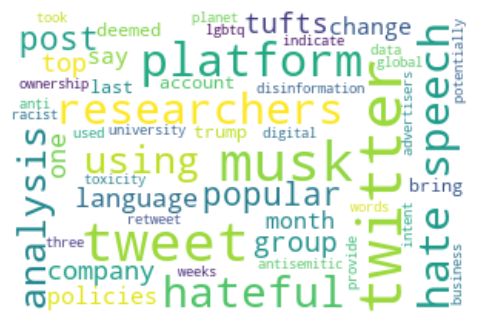

In [315]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud= WordCloud(width=300,
                    height=200,
                    random_state=2,
                    background_color="white",
                    min_font_size=8,
                    max_font_size=40).generate(all_words)
plt.figure(figsize=(7,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

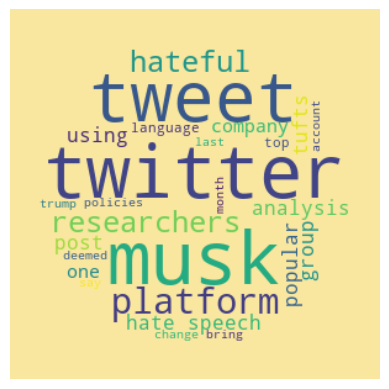

In [316]:
import numpy as np

x,y = np.ogrid[:300, :300]
mask= (x-150) ** 2 + (y-150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="#F9E79F", repeat=True, mask=mask,
min_font_size=8)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

In [317]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fatimeshahin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [318]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [319]:
words_tokens = nltk.word_tokenize(all_words)

In [320]:
fd=FreqDist(words_tokens)

In [321]:
fd

FreqDist({'twitter': 11, 'musk': 9, 'tweets': 7, 'researchers': 5, 'platform': 5, 'hate': 5, 'speech': 5, 'hateful': 5, 'using': 4, 'could': 4, ...})

In [322]:
top_3=fd.most_common(3)
top_3

[('twitter', 11), ('musk', 9), ('tweets', 7)]

In [323]:
fd.tabulate(3)

twitter    musk  tweets 
     11       9       7 


In [324]:
top_10 = fd.most_common (10)

top_10

[('twitter', 11),
 ('musk', 9),
 ('tweets', 7),
 ('researchers', 5),
 ('platform', 5),
 ('hate', 5),
 ('speech', 5),
 ('hateful', 5),
 ('using', 4),
 ('could', 4)]

In [325]:
fd.tabulate(10)

    twitter        musk      tweets researchers    platform        hate      speech     hateful       using       could 
         11           9           7           5           5           5           5           5           4           4 


In [326]:
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
could,4
hate,5
hateful,5
musk,9
platform,5
researchers,5
speech,5
tweets,7
twitter,11
using,4


In [327]:
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,could,4
1,hate,5
2,hateful,5
3,musk,9
4,platform,5
5,researchers,5
6,speech,5
7,tweets,7
8,twitter,11
9,using,4


In [328]:
fd["musk"]

9

In [329]:
import altair as alt
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x"),
     color=alt.value("purple")
).properties(width=400)

alt.Chart(...)